In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

In [13]:
heath_stats_df = pd.read_csv("data/health_stats_global.csv")
heath_stats_df.sample(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
78202,Suriname,SUR,"Population ages 25-29, male (% of male populat...",SP.POP.2529.MA.5Y,6.902259e+00,6.699439e+00,6.485323e+00,6.333941e+00,6.263163e+00,6.230264e+00,...,7.733219e+00,7.988775e+00,8.221806e+00,8.374959e+00,8.462482e+00,8.491794e+00,8.465221e+00,8.390766e+00,8.276785e+00,NaN
33663,Dominican Republic,DOM,Number of neonatal deaths,SH.DTH.NMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.337000e+03,5.257000e+03,5.178000e+03,5.095000e+03,5.040000e+03,4.980000e+03,4.905000e+03,4.801000e+03,4.706000e+03,NaN
85388,United States,USA,Male population 75-79,SP.POP.7579.MA,1.361500e+06,1.384661e+06,1.407194e+06,1.438325e+06,1.479709e+06,1.522894e+06,...,3.146702e+06,3.136794e+06,3.146878e+06,3.190058e+06,3.259453e+06,3.345885e+06,3.433185e+06,3.519993e+06,3.617750e+06,NaN
84322,Ukraine,UKR,"Incidence of tuberculosis (per 100,000 people)",SH.TBS.INCD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230000e+02,1.190000e+02,1.150000e+02,1.100000e+02,1.050000e+02,1.010000e+02,9.600000e+01,9.400000e+01,NaN,NaN
6801,Least developed countries: UN classification,LDC,"Population ages 60-64, male (% of male populat...",SP.POP.6064.MA.5Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65810,Palau,PLW,"Population ages 80 and older, male (% of male ...",SP.POP.80UP.MA.5Y,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73657,Slovak Republic,SVK,Male population 70-74,SP.POP.7074.MA,3.340900e+04,3.407400e+04,3.367300e+04,3.343100e+04,3.427900e+04,3.664200e+04,...,6.462300e+04,6.336100e+04,6.287700e+04,6.343200e+04,6.469300e+04,6.683200e+04,6.954600e+04,7.258200e+04,7.583600e+04,NaN
67053,Peru,PER,"Health expenditure, public (% of GDP)",SH.XPD.PUBL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.414623e+00,2.452034e+00,2.983444e+00,2.794287e+00,2.624140e+00,2.846648e+00,3.045104e+00,3.318751e+00,NaN,NaN
76587,St. Kitts and Nevis,KNA,Vitamin A supplementation coverage rate (% of ...,SN.ITK.VITA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67224,Peru,PER,"Primary completion rate, female (% of relevant...",SE.PRM.CMPT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.065822e+02,1.059788e+02,1.031930e+02,1.048287e+02,1.007969e+02,9.441637e+01,9.581356e+01,9.665563e+01,NaN,NaN


In [4]:
heath_stats_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
count,3.548200e+04,3.532500e+04,3.588900e+04,3.545200e+04,3.548300e+04,3.560300e+04,3.553800e+04,3.602200e+04,3.557700e+04,3.563000e+04,...,5.425500e+04,5.387800e+04,5.443700e+04,5.709900e+04,5.492200e+04,5.492700e+04,5.292400e+04,5.219900e+04,4.306800e+04,0.0
mean,4.398856e+06,4.477329e+06,4.483279e+06,4.634875e+06,4.727806e+06,4.810557e+06,4.923225e+06,4.958680e+06,5.126162e+06,5.229267e+06,...,1.066701e+08,1.178440e+08,1.194416e+08,1.202183e+08,1.354606e+08,1.381746e+08,1.470674e+08,1.534580e+08,9.105685e+06,NaN
std,4.948245e+07,5.013205e+07,5.054473e+07,5.192122e+07,5.297849e+07,5.401988e+07,5.526006e+07,5.607026e+07,5.763263e+07,5.887277e+07,...,1.017662e+10,1.077350e+10,1.114136e+10,1.132855e+10,1.212198e+10,1.255757e+10,1.312843e+10,1.388442e+10,1.112609e+08,NaN
min,-2.374024e+00,-2.498824e+00,-3.826648e+06,-3.206682e+00,-3.078607e+00,-2.978527e+00,-3.072258e+00,-4.094255e+06,-4.263603e+00,-4.645452e+00,...,-2.272986e+07,-7.720454e+00,-7.829848e+00,-9.816607e+00,-8.166639e+00,-1.578482e+07,-7.726345e+00,-7.709485e+00,-7.784170e+00,NaN
25%,1.907975e+01,2.130000e+01,1.790000e+01,2.228200e+01,2.236877e+01,2.013357e+01,2.196439e+01,1.779723e+01,2.226600e+01,2.237234e+01,...,1.360000e+01,1.351170e+01,1.377504e+01,1.326888e+01,1.410000e+01,1.257937e+01,1.393631e+01,1.387011e+01,1.490000e+01,NaN
50%,5.282000e+03,5.794000e+03,5.158000e+03,5.945000e+03,6.065000e+03,5.998000e+03,6.240000e+03,5.767000e+03,6.438000e+03,6.529500e+03,...,9.608101e+01,9.699493e+01,9.670839e+01,9.155791e+01,9.633862e+01,9.610010e+01,9.900000e+01,9.896778e+01,2.206000e+03,NaN
75%,9.993525e+04,1.034000e+05,1.025840e+05,1.078488e+05,1.107500e+05,1.125765e+05,1.156312e+05,1.151888e+05,1.211970e+05,1.243615e+05,...,8.397350e+04,8.621775e+04,8.342100e+04,6.758400e+04,8.207750e+04,8.399800e+04,9.839350e+04,1.037375e+05,1.802958e+05,NaN
max,3.035056e+09,3.076121e+09,3.129064e+09,3.193947e+09,3.259355e+09,3.326054e+09,3.395866e+09,3.465297e+09,3.535512e+09,3.609910e+09,...,2.253595e+12,2.358301e+12,2.451062e+12,2.546451e+12,2.646913e+12,2.750543e+12,2.833419e+12,2.985748e+12,7.346633e+09,NaN


In [5]:
heath_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [26]:
heath_stats_by_country_df = heath_stats_df.set_index("Country Name")
heath_stats_by_country_df = heath_stats_by_country_df.drop(["Country Code", "Indicator Code"], axis=1)
heath_stats_by_country_df.groupby('Indicator Name').count().sample(50)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Health expenditure, private (% of GDP)",0,0,0,0,0,0,0,0,0,0,...,230,230,230,230,230,231,231,231,0,0
"Age population, age 09, female, interpolated",192,192,192,192,192,192,192,192,192,192,...,194,194,194,195,195,194,194,194,194,0
Male population 35-39,233,233,233,233,233,233,233,233,233,233,...,235,235,235,235,235,234,234,234,234,0
Antiretroviral therapy coverage for PMTCT (% of pregnant women living with HIV),0,0,0,0,0,0,0,0,0,0,...,0,0,0,118,118,118,118,118,117,0
"Population ages 70-74, female (% of female population)",192,192,192,192,192,192,192,192,192,192,...,194,194,194,194,194,193,193,193,193,0
"Condom use, population ages 15-24, male (% of males ages 15-24)",0,0,0,0,0,0,0,0,0,0,...,8,5,8,8,13,11,7,3,0,0
"Labor force, female (% of total labor force)",0,0,0,0,0,0,0,0,0,0,...,227,227,227,227,227,226,226,226,0,0
Rural population (% of total population),254,254,254,254,254,254,254,254,254,254,...,256,256,256,256,256,255,255,255,255,0
"Age population, age 13, female, interpolated",192,192,192,192,192,192,192,192,192,192,...,194,194,194,195,195,194,194,194,194,0


In [27]:
heath_stats_by_country_df.head()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
Country Name,,,,,,,,,,,,,,,,,,,,,
Arab World,% of females ages 15-49 having comprehensive c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,% of males ages 15-49 having comprehensive cor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,"Adolescent fertility rate (births per 1,000 wo...",133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,132.675635,131.665502,129.19098,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
Arab World,Adults (ages 15+) and children (0-14 years) li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,Adults (ages 15+) and children (ages 0-14) new...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:

US_femalelabor_mask = (heath_stats_df['Country Name'] == "United States") & (heath_stats_df["Indicator Name"] == "Labor force, female (% of total labor force)")
heath_stats_df[US_femalelabor_mask].T

,85359
Country Name,United States
Indicator Name,"Labor force, female (% of total labor force)"
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN
1965,NaN
1966,NaN
1967,NaN


# Possible Questions to Explore

## Question List:

### Questions about the US?
### Literacy rate, adult male (% of males ages 15 and above)
### Literacy rate, adult female (% of female ages 15 and above)
### Health expenditure, total (% of GDP)
### Population growth (annual %)
### Rural population (% of total population)
### Labor force, female (% of total labor force)	
### Labor force, male (% of total labor force)

TypeError: unhashable type: 'numpy.ndarray'

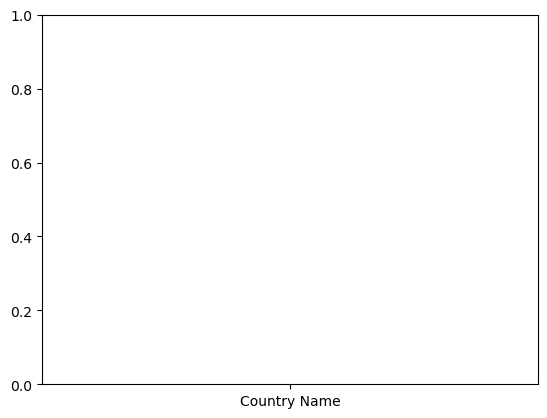

In [54]:
fig, ax = plt.subplots()

ax.plot(heath_stats_df[US_femalelabor_mask].T)